# For this assignment, I wanted to look into Harris Corner Detection because it is a fundamental feature detection algorithm. First I test out HCD, then make my own version of it based on this [tutorial](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

# Additionally, in another notebook I make Difference of Gaussians from scratch.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [17]:
from skimage import io
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)
    return out

In [29]:
import copy

I began by looking at paper because I thought that my application would be making an image scanner from photos. It turned out to be pretty difficult to adjust the parameters of HCD to capture the paper's corners.

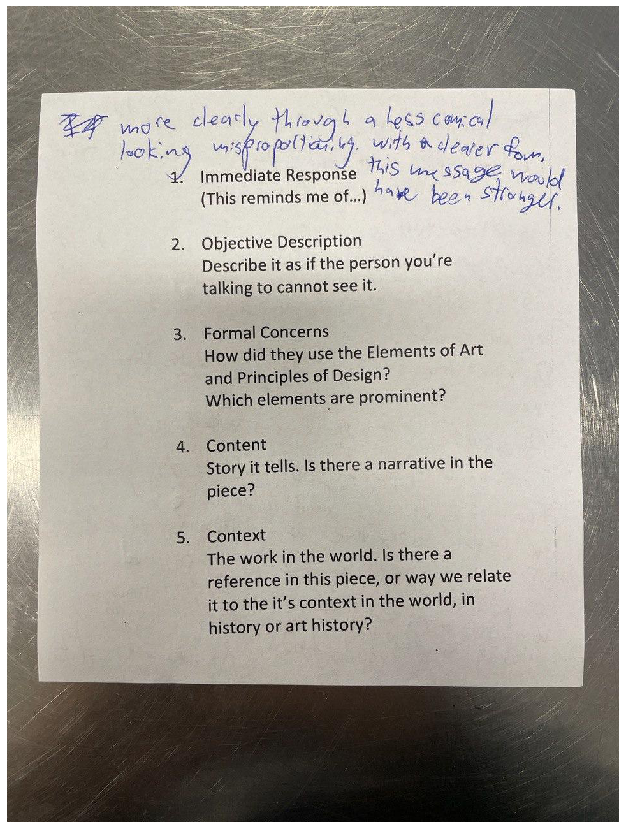

In [96]:
image = load('./CornerImages/photo_2021-11-05_11-06-41.jpg')
display(image)

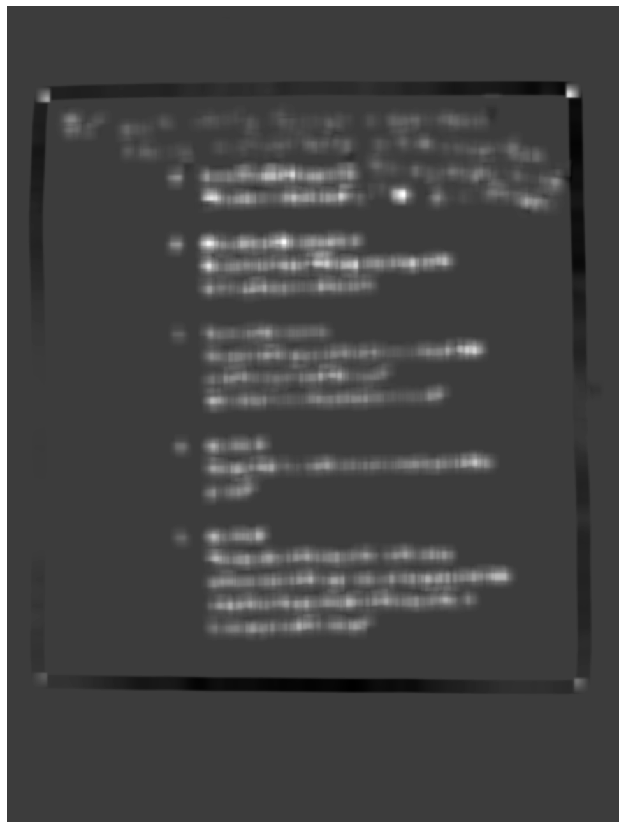

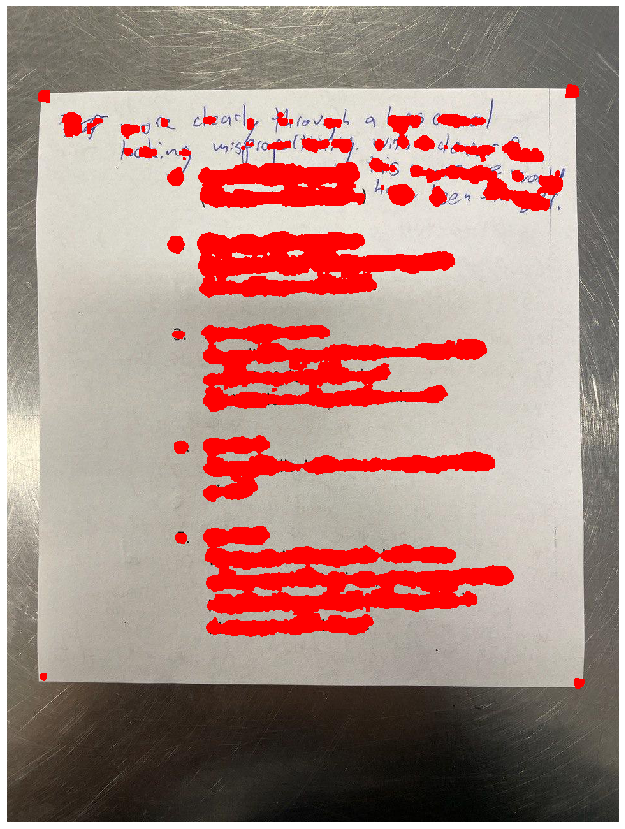

In [93]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,25,27,0.1)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
corner_image = copy.copy(image)

# Threshold for an optimal value, it may vary depending on the image.
corner_image[dst>0.1*dst.max()]=[255,0,0]

display(dst)
display(corner_image)

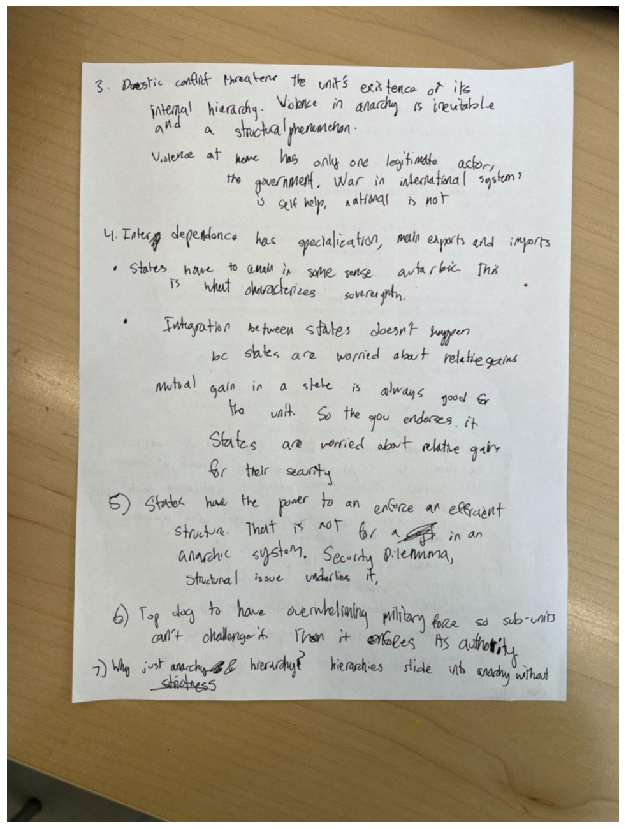

In [113]:
image2 = load('./CornerImages/photo_2021-11-05_11-06-34.jpg')
image2 = cv2.GaussianBlur(image2, (3,3), 0)
display(image2)

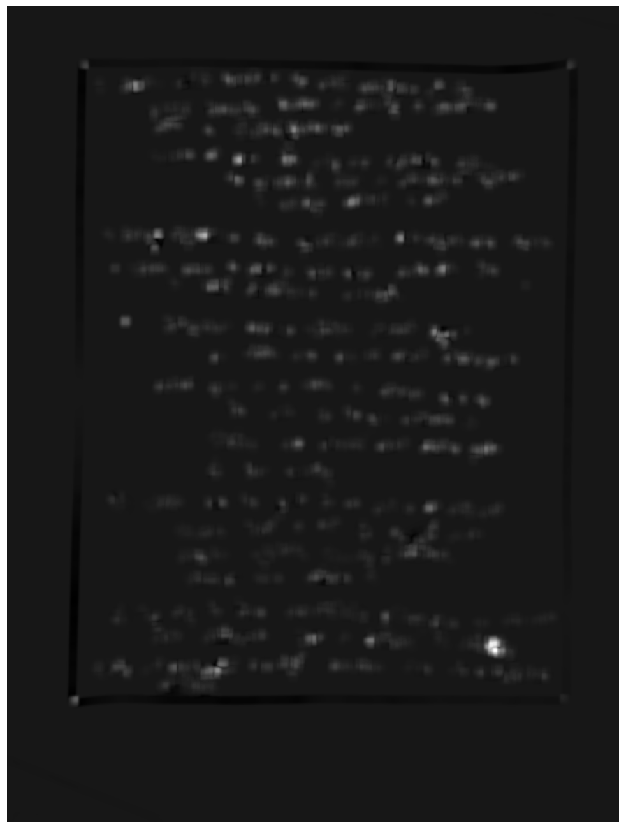

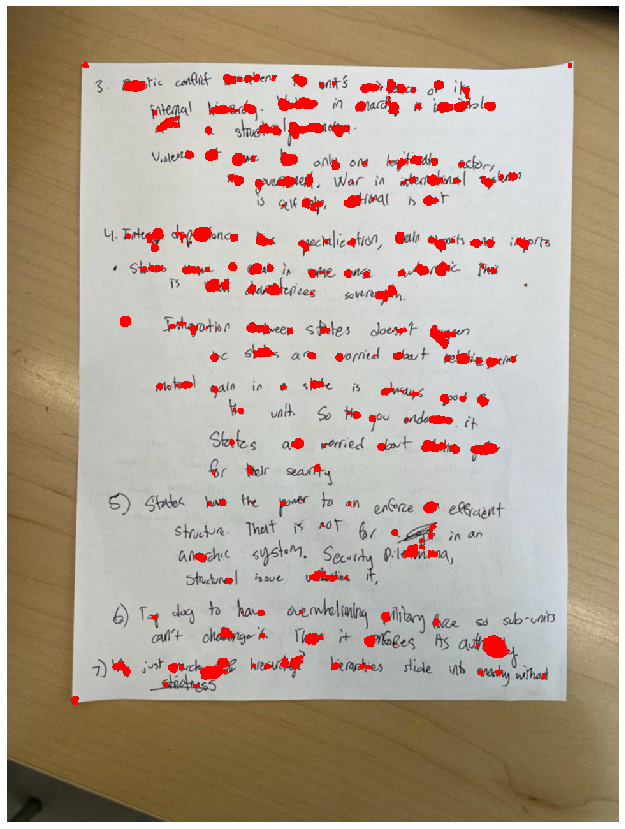

In [126]:
gray = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,17,27,0.1)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
corner_image = copy.copy(image2)

# Threshold for an optimal value, it may vary depending on the image.
corner_image[dst>0.1*dst.max()]=[255,0,0]

display(dst)
display(corner_image)

Then I looked into other images. For the image of the dog (do you remember his name?) I expected to see very few corners. I ran it with both the default parameters from the tutorial, and the parameters I used for finding the paper corners. With the default parameters, it captured a lot of corners although they were very low significance, so with the thresholding I put in place they didn't show up. With the paper settings there were even fewer captured corners. This confirmed my theory.

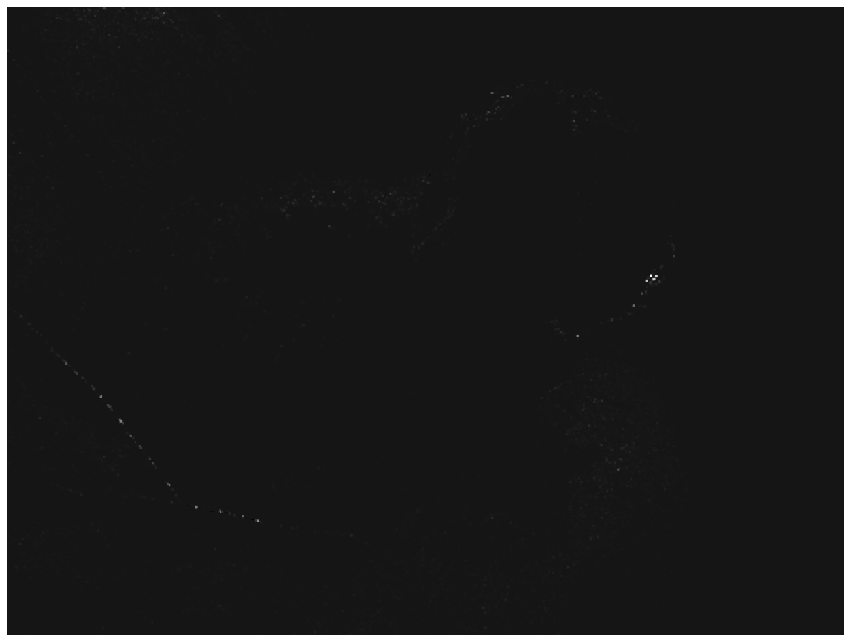

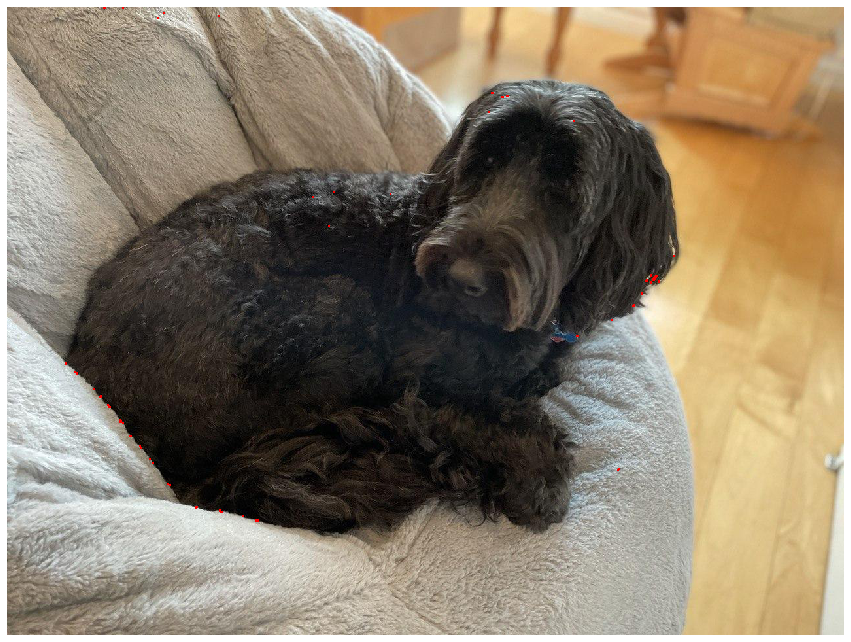

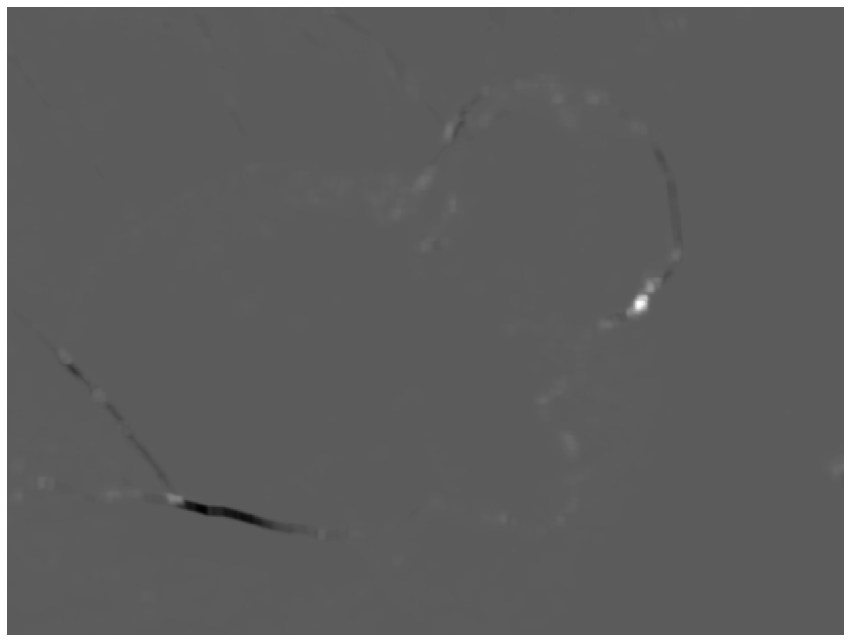

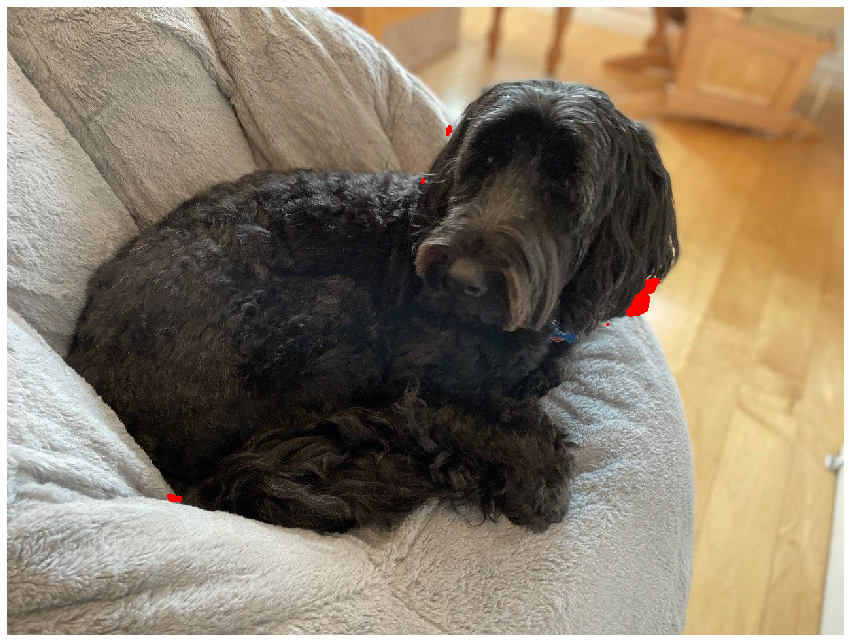

In [130]:
image = load('./CornerImages/photo_2021-11-05_11-06-40.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)  # with the example parameters

dst = cv2.dilate(dst,None)
corner_image = copy.copy(image)

corner_image[dst>0.1*dst.max()]=[255,0,0]

display(dst)
display(corner_image)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,19,27,0.04)  # with the parameters I used for the paper images

dst = cv2.dilate(dst,None)
corner_image = copy.copy(image)

corner_image[dst>0.1*dst.max()]=[255,0,0]
display(dst)
display(corner_image)

For this image of a building, I expected the algorithm to identify the sharp corners of the windows and the building. Because the building is very detailed, I expect there to be a lot of high significance positives. Unsurprisingly to me, the default settings which I knew were best at detecting small sharp changes were not that good at identifying the big building corner features. The paper corner finder worked best.

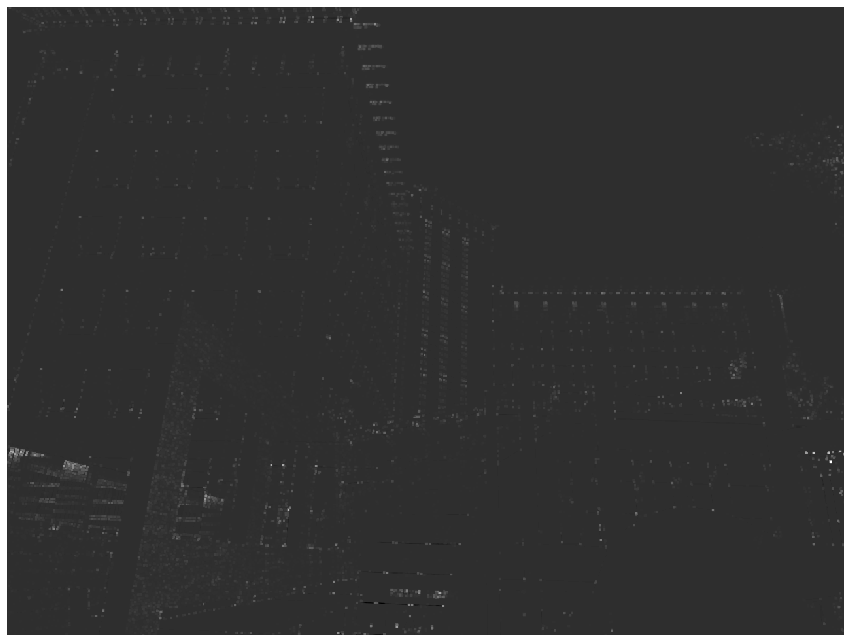

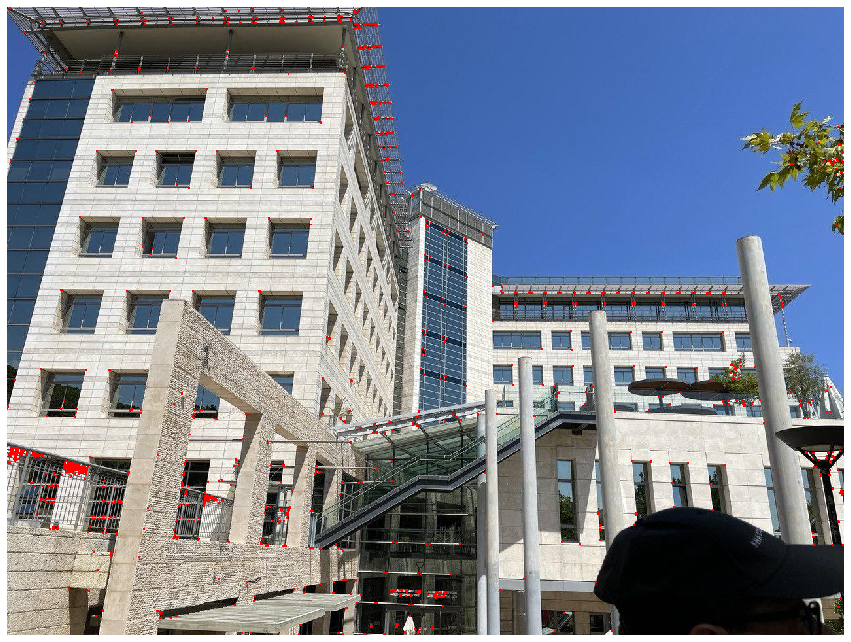

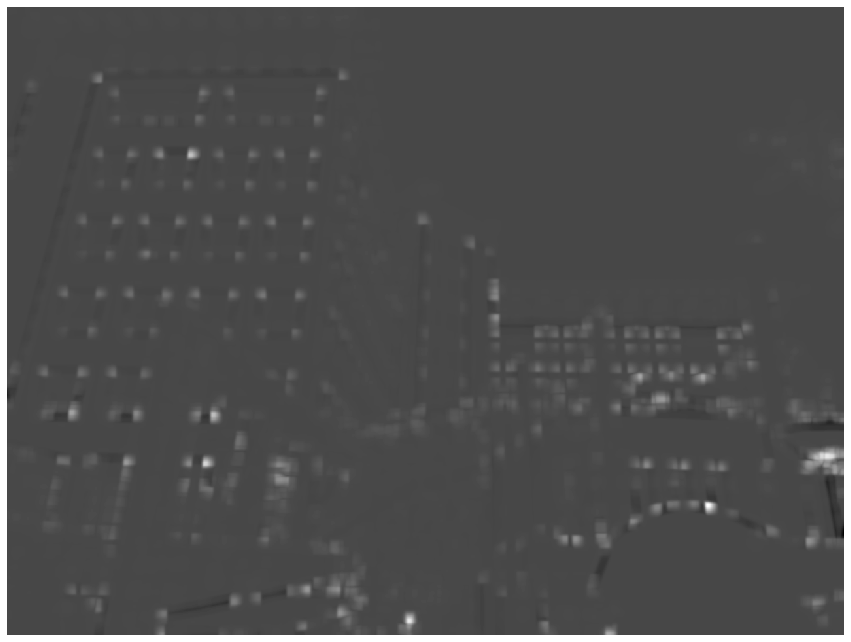

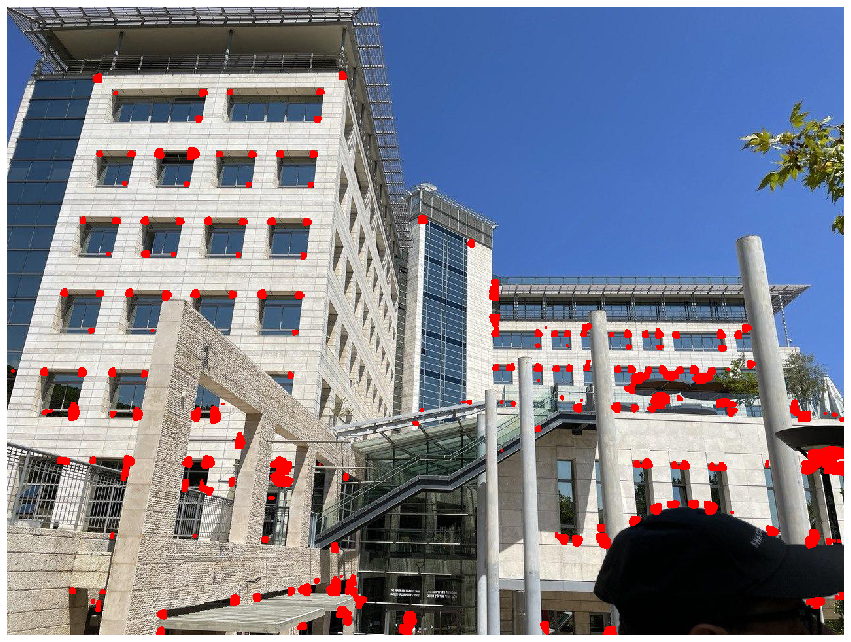

In [131]:
image = load('./CornerImages/photo_2021-11-05_11-06-25.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)  # with the example parameters

dst = cv2.dilate(dst,None)
corner_image = copy.copy(image)

corner_image[dst>0.1*dst.max()]=[255,0,0]

display(dst)
display(corner_image)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,19,27,0.04)  # with the parameters I used for the paper images

dst = cv2.dilate(dst,None)
corner_image = copy.copy(image)

corner_image[dst>0.1*dst.max()]=[255,0,0]
display(dst)
display(corner_image)

## Implementing Harris Corner Detection